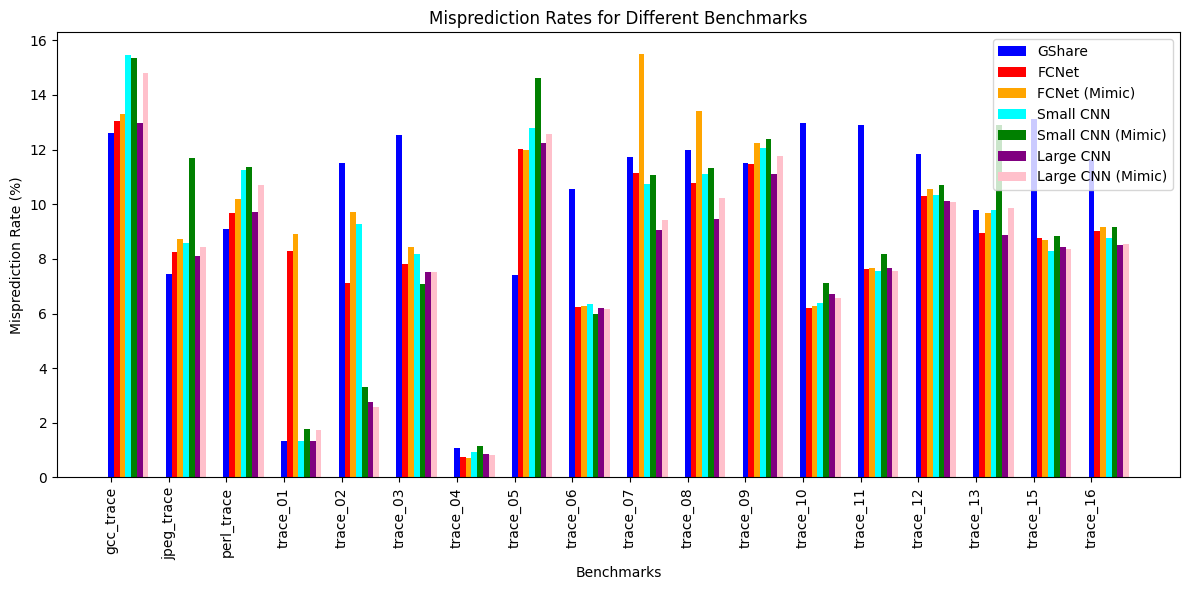

In [5]:
import matplotlib.pyplot as plt
import os

with open("/home/lumi/Git/CDA5106-Branch-Prediction/new_benchmarks.txt", "r") as f:
    lines = f.readlines()
'''
Structure of the lines is as follows:
1. Benchmarking traces/originals/traces_<trace name>.pt...
GShare Misprediction Rate:  <value>
DBN Misprediction Rate: <value>
LeNet Misprediction Rate: <value>
AlexNet Misprediction Rate: <value>
DBN Misprediction Rate (Mimic): <value>
LeNet Misprediction Rate (Mimic): <value>
AlexNet Misprediction Rate (Mimic): <value>
'''



# Plot a bar graph of the misprediction rates for each benchmark

def plot_misprediction_rates(lines):
    # Initialize lists to hold the data
    benchmarks = []
    gshare_rates = []
    dbn_rates = []
    lenet_rates = []
    alexnet_rates = []
    dbn_mimic_rates = []
    lenet_mimic_rates = []
    alexnet_mimic_rates = []

    # Parse the lines
    for line in lines:
        if "Benchmarking" in line:
            benchmarks.append(line.split("/")[-1].strip().split(".")[0].replace("traces_", "").replace("_Formatted", "").replace("orig_", ""))
        elif "GShare Misprediction Rate:" in line:
            gshare_rates.append(float(line.split(":")[-1].strip()))
        elif "DBN Misprediction Rate:" in line:
            dbn_rates.append(float(line.split(":")[-1].strip()))
        elif "LeNet Misprediction Rate:" in line:
            lenet_rates.append(float(line.split(":")[-1].strip()))
        elif "AlexNet Misprediction Rate:" in line:
            alexnet_rates.append(float(line.split(":")[-1].strip()))
        elif "DBN Misprediction Rate (Mimic):" in line:
            dbn_mimic_rates.append(float(line.split(":")[-1].strip()))
        elif "LeNet Misprediction Rate (Mimic):" in line:
            lenet_mimic_rates.append(float(line.split(":")[-1].strip()))
        elif "AlexNet Misprediction Rate (Mimic):" in line:
            alexnet_mimic_rates.append(float(line.split(":")[-1].strip()))

    # Sort benchmarks and rates by benchmark names
    sorted_indices = sorted(range(len(benchmarks)), key=lambda k: benchmarks[k])
    benchmarks = [benchmarks[i] for i in sorted_indices]
    gshare_rates = [gshare_rates[i] for i in sorted_indices]
    dbn_rates = [dbn_rates[i] for i in sorted_indices]
    lenet_rates = [lenet_rates[i] for i in sorted_indices]
    alexnet_rates = [alexnet_rates[i] for i in sorted_indices]
    dbn_mimic_rates = [dbn_mimic_rates[i] for i in sorted_indices]
    lenet_mimic_rates = [lenet_mimic_rates[i] for i in sorted_indices]
    alexnet_mimic_rates = [alexnet_mimic_rates[i] for i in sorted_indices]
    
    # Create a bar graph
    x = range(len(benchmarks))
    width = 0.1
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x, gshare_rates, width, label='GShare', color='blue')
    ax.bar([p + width for p in x], dbn_rates, width, label='FCNet', color='red')
    ax.bar([p + width * 2 for p in x], dbn_mimic_rates, width, label='FCNet (Mimic)', color='orange')
    ax.bar([p + width * 3 for p in x], lenet_rates, width, label='Small CNN', color='cyan')
    ax.bar([p + width * 4 for p in x], lenet_mimic_rates, width, label='Small CNN (Mimic)', color='green')

    ax.bar([p + width * 5 for p in x], alexnet_rates, width, label='Large CNN', color='purple')
    ax.bar([p + width * 6 for p in x], alexnet_mimic_rates, width, label='Large CNN (Mimic)', color='pink')
    
    ax.set_xlabel('Benchmarks')
    ax.set_ylabel('Misprediction Rate (%)')
    ax.set_title('Misprediction Rates for Different Benchmarks')
    ax.set_xticks([p for p in x])
    ax.set_xticklabels(benchmarks, rotation=90)
    ax.legend()
    plt.tight_layout()
    # plt.show()
    plt.savefig("new_misprediction_rates.png", dpi=300)
    plt.show()
# Call the function to plot the graph
plot_misprediction_rates(lines)